In [2]:
import pandas as pd
# Load the Titanic dataset
train_path = r"C:\Users\admin\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv"
test_path  = r"C:\Users\admin\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv"

# Read the CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display the first few rows of the training dataset
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Drop irrelevant columns
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])  # male = 1, female = 0
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

# Define features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed data
X_train.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_7304\2612114131.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
ROC-AUC Score: 0.8824


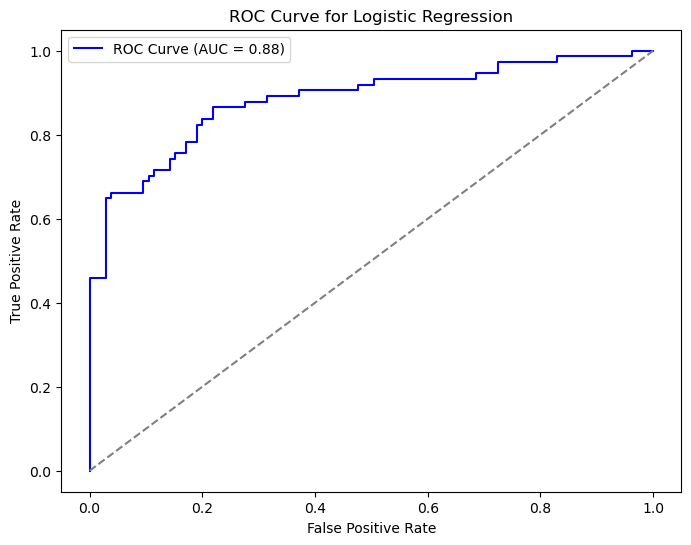

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()


In [6]:
# Extract feature importance (logistic regression coefficients)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display feature importance
coefficients


,Feature,Coefficient
5,Fare,0.002534
2,Age,-0.030433
4,Parch,-0.111849
6,Embarked,-0.218778
3,SibSp,-0.293906
0,Pclass,-0.930679
1,Sex,-2.596996


In [4]:
# Explanation of Precision vs Recall
print("\nPrecision measures how many predicted positive cases are actually positive.")
print("Formula: Precision = TP / (TP + FP)")
print("\nRecall measures how many actual positive cases were correctly predicted.")
print("Formula: Recall = TP / (TP + FN)")
print("\nPrecision is important when false positives are costly (e.g., spam detection).")
print("Recall is important when false negatives are costly (e.g., medical diagnosis).")



# Explanation of Cross-Validation
print("\nCross-validation splits data into multiple subsets and trains the model multiple times.")
print("It helps prevent overfitting and provides a more reliable model evaluation.")
print("Common methods include k-fold cross-validation and stratified k-fold.")


Precision measures how many predicted positive cases are actually positive.
Formula: Precision = TP / (TP + FP)

Recall measures how many actual positive cases were correctly predicted.
Formula: Recall = TP / (TP + FN)

Precision is important when false positives are costly (e.g., spam detection).
Recall is important when false negatives are costly (e.g., medical diagnosis).

Cross-validation splits data into multiple subsets and trains the model multiple times.
It helps prevent overfitting and provides a more reliable model evaluation.
Common methods include k-fold cross-validation and stratified k-fold.


In [2]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Streamlit app title
st.title("🚢 Titanic Survival Prediction App")

# File uploader
uploaded_file = st.file_uploader(r"C:\Users\admin\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv", type=["csv"])

if uploaded_file:
    # Load dataset
    df = pd.read_csv(uploaded_file)

    # Display dataset preview
    st.write("### Dataset Preview:")
    st.write(df.head())

    # Drop irrelevant columns
    df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male = 1, female = 0
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

    # Define features and target
    X = df.drop(columns=['Survived'])
    y = df['Survived']

    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train logistic regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Evaluate performance
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    # Display evaluation metrics
    st.write("### Model Performance:")
    st.write(f"**Accuracy:** {accuracy:.4f}")
    st.write(f"**Precision:** {precision:.4f}")
    st.write(f"**Recall:** {recall:.4f}")
    st.write(f"**F1 Score:** {f1:.4f}")
    st.write(f"**ROC-AUC Score:** {roc_auc:.4f}")

    # Plot ROC Curve
    st.write("### ROC Curve:")
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
    ax.plot([0, 1], [0, 1], linestyle='--', color='grey')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve for Logistic Regression')
    ax.legend()
    st.pyplot(fig)

    # Allow users to download the trained model (optional)
    st.write("### Download Trained Model")
    import pickle
    model_file = "logistic_regression_titanic.pkl"
    with open(model_file, "wb") as f:
        pickle.dump(model, f)
    with open(model_file, "rb") as f:
        st.download_button("Download Model", f, file_name="logistic_regression_titanic.pkl")


2025-03-25 19:35:18.952 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
